# Hypothesis Testing

The goal of hypothesis testing is to determine whether observed effects that we see in a sample are likely to also appear in the larger population or whether it is likely that those were just due to the randomness inherent in taking a sample.

We will be trying to answer “Given a sample and an apparent effect, what is the probability of seeing such an effect by chance?”

Since we are only looking at a sample of the population, if we calculate statistics from this sample, we are unlikely to get the same values as the corresponding population parameters.

## Resampling/Permutation Tests

NOTE: Probably this should be spun off into a new notebook, but I'll keep it here for now.

With **resampling**, we draw repeated samples from observed data with the goal of assessing random variability in a statistic.

**The Big Idea:** We are trying to determine if two samples came from the same underlying distribution. If they came from the same distribution, then the label is irrelevant, and if we shuffle them, then it is still a sample from the same distribution.

We start with the null hypothesis that the two samples came from the same distribution, and look at the distribution of some test statistic (eg. difference in means), by randomly permuting the samples a large number of times and recalculating the test statistic.

That is, the $p$-value is the proportion of test statistics calculated from permutations that were at least as extreme as the observed test statistic.

This is a non-parametric method, since we don't care how the data was generated (i.e., it doesn't matter if it was from a normal distribution).

See: http://faculty.washington.edu/yenchic/18W_425/Lec3_permutation.pdf

Let's look at the example with the amount of time spent sleeping. First, let's capture the observed difference in means.

In [11]:
import pandas as pd
import numpy as np

In [1]:
sleeping = pd.read_csv('../data/atus_sleeping.csv')

In [59]:
observed_difference = sleeping[sleeping.sex == 'Female'].minutes_spent_sleeping.mean() - sleeping[sleeping.sex == 'Male'].minutes_spent_sleeping.mean()
observed_difference

62.72000000000003

Now, we will randomly shuffle the sex labels and see what the distribution of differences looks like.

In [86]:
num_Female = len(sleeping[sleeping.sex == 'Female'])
sleep_times = sleeping.minutes_spent_sleeping.tolist()

In [144]:
np.random.shuffle(sleep_times)

np.mean(sleep_times[:num_Female]) - np.mean(sleep_times[num_Female:])

-33.91999999999996

In [167]:
num_permutations = 10000

permutation_differences = [None] * num_permutations
for i in range(num_permutations):
    np.random.shuffle(sleep_times)

    permutation_differences[i] = np.mean(sleep_times[:num_Female]) - np.mean(sleep_times[num_Female:])

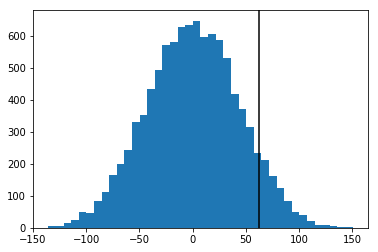

In [168]:
plt.hist(permutation_differences, bins = 40)
plt.axvline(x = observed_difference, color = 'black');

In [169]:
print('p-value: ', 
      len([x for x in permutation_differences if x >= observed_difference]) / len(permutation_differences))

p-value:  0.0764


Now, let's repeat this for the grooming dataset.

In [170]:
observed_difference = grooming[grooming.sex == 'Female'].minutes_spent_grooming.mean() - grooming[grooming.sex == 'Male'].minutes_spent_grooming.mean()
observed_difference

20.68

In [172]:
num_Female = len(grooming[grooming.sex == 'Female'])
grooming_times = grooming.minutes_spent_grooming.tolist()

In [173]:
num_permutations = 10000

permutation_differences = [None] * num_permutations
for i in range(num_permutations):
    np.random.shuffle(grooming_times)

    permutation_differences[i] = np.mean(grooming_times[:num_Female]) - np.mean(grooming_times[num_Female:])

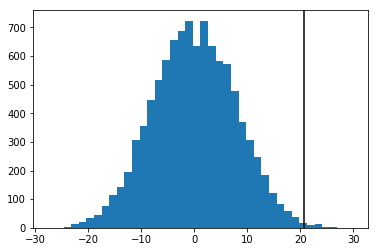

In [175]:
plt.hist(permutation_differences, bins = 40)
plt.axvline(x = observed_difference, color = 'black');

In [174]:
print('p-value: ', 
      len([x for x in permutation_differences if x >= observed_difference]) / len(permutation_differences))

p-value:  0.0038


In [218]:
def permutation_test(a,b, num_permutations = 10000):
    ''' 
    Returns the p-value when conducting a permutation test for the mean of group a being larger than the mean of group b
    a and b must be lists.
    '''
    
    a, b = list(a), list(b)
    observed_difference = np.mean(a) - np.mean(b)
    values = a + b
    
    permutation_differences = [None] * num_permutations
    for i in range(num_permutations):
        np.random.shuffle(values)
        permutation_differences[i] = np.mean(values[:len(a)]) - np.mean(values[len(a):])
        
    return len([x for x in permutation_differences if x >= observed_difference]) / num_permutations

In [223]:
permutation_test(grooming[grooming.sex == 'Female'].minutes_spent_grooming,
                grooming[grooming.sex == 'Male'].minutes_spent_grooming)

0.0038

In [232]:
permutation_test(sleeping[sleeping.sex == 'Female'].minutes_spent_sleeping,
                sleeping[sleeping.sex == 'Male'].minutes_spent_sleeping)

0.0721

## Permutation Test for Proportion

We can also perform permutation tests for the difference in proportions. Here, we randomly shuffle the values and recalculate the difference in observed proportions across groups.

In [2]:
squirrels = pd.read_csv('../data/2018_Central_Park_Squirrel_Census_-_Squirrel_Data.csv')

In [3]:
squirrels = squirrels[~squirrels['Primary Fur Color'].isna()]

squirrels['Black'] = squirrels['Primary Fur Color'] == 'Black'

In [7]:
observed_difference = len(squirrels[(squirrels['Black'] == True) & (squirrels['Runs from'] == True)]) / len(squirrels[squirrels['Black'] == True]) - len(squirrels[(squirrels['Black'] == False) & (squirrels['Runs from'] == True)]) / len(squirrels[squirrels['Black'] == False])

observed_difference

0.08799200257544179

So in our data, we say that the proportion on black squirrels that ran away from humans was 8.8% higher than the proportion of non-black squirrels that ran away from humans.

In [9]:
num_black = len(squirrels[squirrels['Black'] == True])
run = squirrels['Runs from'].to_list()

In [16]:
num_permutations = 10000

permutation_differences = [None] * num_permutations
for i in range(num_permutations):
    np.random.shuffle(run)

    permutation_differences[i] = np.mean(run[:num_black]) - np.mean(run[num_black:])

In [17]:
print('p-value: ', 
      len([x for x in permutation_differences if x >= observed_difference]) / len(permutation_differences))

p-value:  0.0271
